## Import dependencies


In [100]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

import seaborn as sns

## Read data

In [101]:
X_train = pd.read_csv("../data/train_test_val/X_train.csv", header=[0], index_col=0).reset_index(drop=True)
X_test = pd.read_csv("../data/train_test_val/X_test.csv", header=[0], index_col=0).reset_index(drop=True)
X_val = pd.read_csv("../data/train_test_val/X_val.csv", header=[0], index_col=0).reset_index(drop=True)

y_train = pd.read_csv("../data/train_test_val/y_train.csv", index_col=0) .reset_index(drop=True)
y_val = pd.read_csv("../data/train_test_val/y_val.csv", index_col = 0).reset_index(drop=True)
y_test = pd.read_csv("../data/train_test_val/y_test.csv", index_col = 0).reset_index(drop=True)

In [102]:
X_train

,measurementID,id_gps,x_lin_acc_sum,x_lin_acc_mean,x_lin_acc_mad,x_lin_acc_median,x_lin_acc_min,x_lin_acc_max,x_lin_acc_std,x_lin_acc_var,...,z_gyro_min,z_gyro_max,z_gyro_std,z_gyro_var,z_gyro_sem,z_gyro_skew,z_gyro_quantile,z_gyro_kurtosis_time,z_gyro_rms_100,z_gyro_crest
0,1,104,-5.630926,-0.112619,0.463467,0.002755,-2.139405,0.858242,0.616271,0.379791,...,-0.058362,0.061633,0.031826,0.001013,0.004501,-0.164444,0.005054,-1.052494,0.031948,1.929158
1,1,108,0.991784,0.019836,0.412926,0.047406,-1.423582,1.588131,0.556120,0.309269,...,-0.007594,0.055207,0.014518,0.000211,0.002053,0.820593,0.014877,0.313919,0.022055,2.503118
2,0,46,-1.313392,-0.026268,0.425894,-0.019491,-0.877647,1.381360,0.523438,0.273987,...,-0.028631,0.027252,0.013123,0.000172,0.001856,-0.183553,-0.000196,-0.753331,0.013059,2.192405
3,0,36,-17.335969,-0.346719,0.265099,-0.369891,-1.123201,0.318593,0.334180,0.111677,...,0.052679,0.108141,0.014280,0.000204,0.002020,-0.160709,0.084295,-0.889527,0.081771,1.322476
4,0,84,-13.587321,-0.271746,0.378483,-0.224591,-1.145766,0.664876,0.456053,0.207984,...,-0.052673,0.047069,0.032645,0.001066,0.004617,-0.643983,0.019208,-1.208227,0.032616,1.614955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1,302,-7.354923,-0.147098,0.237549,-0.071392,-0.939558,0.297848,0.293105,0.085911,...,0.007316,0.050281,0.011278,0.000127,0.001595,-0.336874,0.034239,-0.893674,0.032266,1.558319
794,2,286,-0.745917,-0.014918,0.136314,-0.016545,-0.347801,0.312137,0.167534,0.028068,...,-0.018671,0.001842,0.004084,0.000017,0.000578,-0.740613,-0.005200,1.078238,0.006606,2.826375
795,1,33,-11.847543,-0.236951,0.269892,-0.278131,-1.098083,0.492954,0.344728,0.118838,...,-0.054299,0.032413,0.024571,0.000604,0.003475,-0.372729,-0.004775,-0.849315,0.024642,2.203522
796,2,279,4.653097,0.093062,0.197239,0.096007,-0.590216,0.701212,0.255596,0.065329,...,-0.029333,0.005069,0.008806,0.000078,0.001245,0.411082,-0.014021,-0.542197,0.015878,1.847417


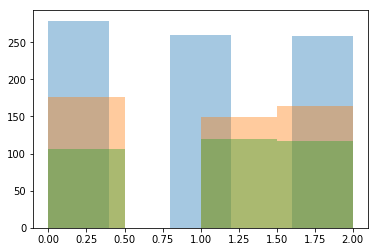

In [103]:
sns.distplot(y_train, kde=False)
sns.distplot(y_val, kde=False)
sns.distplot(y_test, kde=False)

### Creating ML Pipeline

In [104]:
rfc = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
knc = KNeighborsClassifier()
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
gnb = GaussianNB()
# lr = LogisticRegressionCV(max_iter=500, random_state=42)

models = {"rfc": rfc,"svc": svc, "knc" : knc,
          "abc" : abc, "gbc" : gbc, "gnb" :gnb}

In [105]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train.drop(["measurementID","id_gps"], axis=1)) 
scaled_X_val = scaler.fit_transform(X_val.drop(["measurementID","id_gps"], axis=1))
scaled_X_test = scaler.fit_transform(X_test.drop(["measurementID","id_gps"], axis=1))

In [106]:
# X_train = X_train.drop("id_gps", axis = 1)
# X_val = X_val.drop("id_gps", axis = 1)
# X_test = X_test.drop("id_gps", axis = 1)
# y_train = np.ravel(y_train.values)
# y_val = np.ravel(y_val.values)
# y_test = np.ravel(y_test.values)


c:\users\mesza\.virtualenvs\road-surface-quality-7nv9hwjf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Metrics on Validation Dataset:


Accuracy rfc: 0.787321063394683
Precision rfc: 0.7859767635210939
Recall rfc: 0.787321063394683
F1 Score rfc: 0.7863652161647308


Cross Validation on Test Dataset:


rfc accuracy is 74.85±6.38


Test Scores:
 min: 0.631578947368421
 max: 0.8245614035087719
 delta: 0.19298245614035092


********************


Metrics on Validation Dataset:

c:\users\mesza\.virtualenvs\road-surface-quality-7nv9hwjf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().






Accuracy svc: 0.7770961145194274
Precision svc: 0.7757042979742367
Recall svc: 0.7770961145194274
F1 Score svc: 0.7745006502914272


Cross Validation on Test Dataset:


svc accuracy is 70.76±4.14


Test Scores:
 min: 0.631578947368421
 max: 0.7543859649122807
 delta: 0.1228070175438597


********************




c:\users\mesza\.virtualenvs\road-surface-quality-7nv9hwjf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Metrics on Validation Dataset:


Accuracy knc: 0.7402862985685071
Precision knc: 0.7341122060342162
Recall knc: 0.7402862985685071
F1 Score knc: 0.7337642894550938


Cross Validation on Test Dataset:


knc accuracy is 66.96±5.40


Test Scores:
 min: 0.5789473684210527
 max: 0.7192982456140351
 delta: 0.14035087719298245


********************




c:\users\mesza\.virtualenvs\road-surface-quality-7nv9hwjf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Metrics on Validation Dataset:


Accuracy abc: 0.6666666666666666
Precision abc: 0.698544060475643
Recall abc: 0.6666666666666666
F1 Score abc: 0.6750612423849425


Cross Validation on Test Dataset:


abc accuracy is 66.08±7.21


Test Scores:
 min: 0.5789473684210527
 max: 0.7719298245614035
 delta: 0.1929824561403508


********************




c:\users\mesza\.virtualenvs\road-surface-quality-7nv9hwjf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Metrics on Validation Dataset:


Accuracy gbc: 0.7995910020449898
Precision gbc: 0.8022047653281801
Recall gbc: 0.7995910020449898
F1 Score gbc: 0.8006646477295012


Cross Validation on Test Dataset:


gbc accuracy is 75.15±7.05


Test Scores:
 min: 0.6666666666666666
 max: 0.8421052631578947
 delta: 0.17543859649122806


********************


Metrics on Validation Dataset:


Accuracy gnb: 0.7096114519427403
Precision gnb: 0.7156308783460972
Recall gnb: 0.7096114519427403
F1 Score gnb: 0.7065104799605876


Cross Validation on Test Dataset:


gnb accuracy is 66.37±6.11


Test Scores:
 min: 0.5789473684210527
 max: 0.7543859649122807
 delta: 0.17543859649122806


********************




c:\users\mesza\.virtualenvs\road-surface-quality-7nv9hwjf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



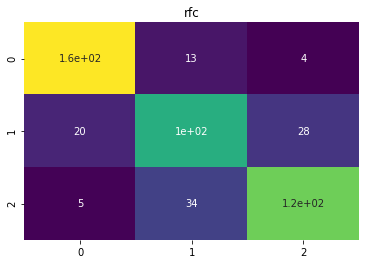

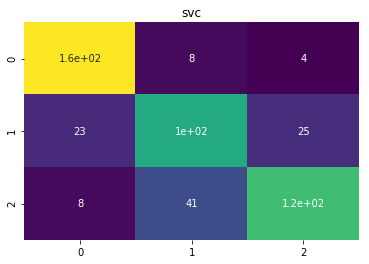

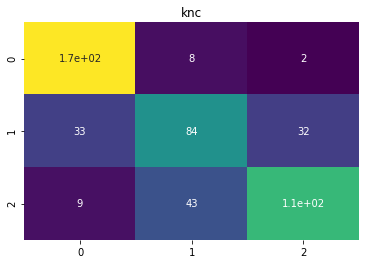

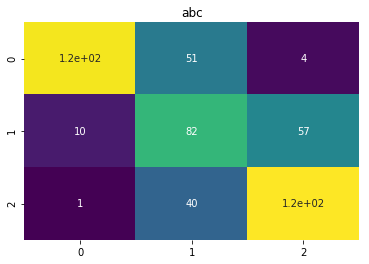

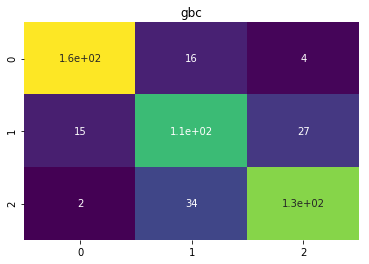

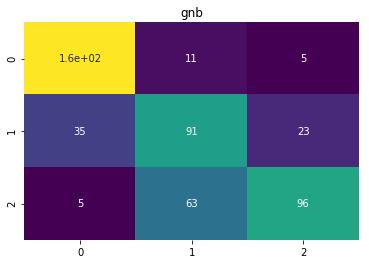

In [107]:
for m in models:
    
    model = models[m].fit(scaled_X_train, y_train)
    preds = model.predict(scaled_X_val)
      
    accuracy = accuracy_score(y_val,preds)
    precision = precision_score(y_val,preds,average="weighted")
    recall = recall_score(y_val,preds, average="weighted")
    f1 = f1_score(y_val, preds, average="weighted")
    
    print("Metrics on Validation Dataset:")
    print("\n")
    
    print(f"Accuracy {m}: {accuracy}")
    print(f"Precision {m}: {precision}")
    print(f"Recall {m}: {recall}")
    print(f"F1 Score {m}: {f1}")
    
    print("\n")
    print("Cross Validation on Test Dataset:")
    print("\n")
    cv = cross_validate(model,
                        X =  scaled_X_test,
                        y = np.ravel(y_test),
                        cv = 6)

    print("{} accuracy is {:.2f}±{:.2f}".format(m,cv["test_score"].mean()*100,cv["test_score"].std()*100))

    
    print("\n")
    print("Test Scores:\n min: {}\n max: {}\n delta: {}"\
          .format(cv["test_score"].min(), 
                  cv["test_score"].max(),
                  cv["test_score"].max()-cv["test_score"].min()))
    print("\n")
    print("*"*20)
    print("\n")
    
    cm = confusion_matrix(y_val,preds)
    
    fig = plt.figure()
    fig = plt.title(m)
    sns.heatmap(cm, cmap="viridis", annot= True, cbar = False)

In [108]:
rfc.fit(scaled_X_train, y_train)

c:\users\mesza\.virtualenvs\road-surface-quality-7nv9hwjf\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=42)

## Hyperparameter tuning

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Cross Validation

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

In [25]:
cv = cross_validate(rfc,
               X =  scaled_X_test,
               y = np.ravel(y_test))

print("Model accuracy is {:.2f}±{:.2f}".format(cv["test_score"].mean()*100,cv["test_score"].std()*100))
print(cv)

Model accuracy is 77.99±2.74
{'fit_time': array([0.46173453, 0.50171137, 0.48572111, 0.452739  , 0.48972178]), 'score_time': array([0.02198958, 0.0339818 , 0.01799011, 0.01998782, 0.02098584]), 'test_score': array([0.81914894, 0.78723404, 0.73404255, 0.77419355, 0.78494624])}


In [27]:
cm = confusion_matrix(y_val,preds)

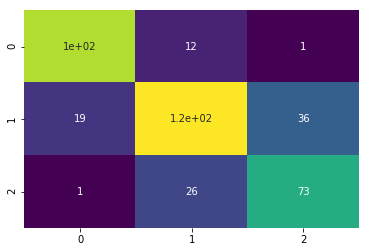

In [28]:
sns.heatmap(cm, cmap="viridis", annot= True, cbar = False)

## Save the model

In [25]:
from joblib import dump, load
dump(rfc, '../models/rfc_v12.joblib') 

['../models/rfc_v12.joblib']

## Eval


In [110]:
from processing_funcs import *
from scipy.stats import norm, kurtosis
from scipy import signal
import glob

In [111]:
df = read_measurement("../data/raw_data_train/rsq_q1/*", 1/50)

In [72]:
df = read_all()

In [74]:
df = df[df["label"] == 0]

In [77]:
df = df.drop(["label","time"], axis = 1)

In [112]:
def kurtosis_time(x):

    return kurtosis(x, fisher=True)

def rms_100(x):

    return np.sqrt(np.mean(x**2))

def crest(x):

    return max(abs(x))/np.sqrt(np.mean(x**2))

def create_aggregated(df):
    """Create a aggregated dataframe in time domain"""
    signals = ['x_lin_acc', 'y_lin_acc', "z_lin_acc", 
               'x_acc', 'y_acc', 'z_acc',
               'x_gyro', 'y_gyro', 'z_gyro']

    agg_df = df.groupby(["id_gps"]).agg({x: ["sum", "mean", "mad",
                                                "median", "min", "max",
                                                "std", "var", "sem",
                                                "skew", "quantile",
                                                kurtosis_time, rms_100,
                                                crest] for x in signals})
    
    new_cols = []
    
    for k,i in enumerate(agg_df.columns):
        
        new_cols.append(i[0] + "_" +  i[1])

    agg_df.columns = new_cols
    
    return agg_df

In [113]:
feature_df = create_aggregated(df).reset_index()

In [114]:
scaler = StandardScaler()
scaled = scaler.fit_transform(feature_df.drop("id_gps", axis=1)) 

In [115]:
pred = rfc.predict(scaled)

In [117]:
accuracy_score([1 for x in range(len(pred))],pred)

0.6292335115864528

In [118]:
fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="lon",
                        zoom = 12, 
                        height=500, 
#                         color = "label", 
                        color_continuous_scale=["green","blue","red"])
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.layout.coloraxis.showscale = False
fig